## Chi-Square Test

* The test is applied when you have two categorical variables from a single population. 
* We also compare variances. 
* It is used to  determine whether there is a significant association between the two variables.
* We use the function stats.chi2_contingency(contingency_table)
* This function gives 4 values: chi-square statistic, p-value, df, expected values (matrix)
* We calculate the chi-square critical value using chi2.ppf(q=1-alpha,df=df)\
* Compare p with alpha or chi_stat with chi_crit 

Q) For example, in an election survey, voters might be classified by gender (male or female) and shopping preference (Yes/No).

Here we can use a chi-square test for independence to determine whether gender is related to shopping preference

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
H0 = "There is no relationship between the categorical variables"
H1 = "There is a relationship between the categorical variables"

In [3]:
df = pd.read_excel('datasets/chi-test.xlsx')
df.head()

,Gender,Like Shopping?
0,Male,No
1,Female,Yes
2,Male,Yes
3,Female,Yes
4,Female,Yes


* Step 1: Let's first calculate the **cross table**

In [5]:
contingency_table=pd.crosstab(df["Gender"],df["Like Shopping?"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 Like Shopping?  No  Yes
Gender                 
Female           2    3
Male             2    2


In [17]:
# dof = (contingency_table.shape[0] -1)*(contingency_table.shape[1] -1) # dof = (r-1)*(c-1) of CTable
# print("Degree of Freedom:",dof) ## dof will be given by the chi2 function itself

alpha = 0.05 # assumed
print('alpha =', alpha)

alpha = 0.05


* Step 2: Extract the **contingency matrix** of numbers alone. These will be the observed frequencies

In [9]:
#Observed Values
Observed_freq = contingency_table.values 
print("Observed Values :-\n",Observed_freq)

Observed Values :-
 [[2 3]
 [2 2]]


* Step 3: We calculate the p_value using the function **stats.chi2_contingency(Observed_freq)**

In [15]:
chi_stat, p, dof, expected_values=stats.chi2_contingency(Observed_freq)
print("chi_statistic = ", chi_stat, "p = ", p)

chi_statistic =  0.1406249999999999 p =  0.7076604666545525


* Step 4: We calculate the chi-square critical value

In [11]:
chi_crit = stats.chi2.ppf(1-alpha,df=dof)
print('critical_value:',chi_crit)

critical_value: 3.841458820694124


* Step 5: Compare p with alpha or chi_statistic with chi_critical

In [14]:
print('p-value:',p)
print('Significance level: ',alpha)
print('Degree of Freedom: ',dof)
print('chi-square statistic:',chi_stat)
print('critical_value:',chi_crit)

p-value: 0.7076604666545525
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.1406249999999999
critical_value: 3.841458820694124


In [13]:
print('From chi-square value:')

if chi_stat  >= chi_crit:
    print("Reject null hypothesis.", H1)
else:
    print("Failed to reject the null hypothesis.", H0)

# ------------------------------------------------------
print('\nFrom p-value:')

if p <= alpha:
    print("Reject null hypothesis.", H1)
else:
    print("Failed to reject the null hypothesis.", H0)

From chi-square value:
Failed to reject the null hypothesis. There is no relationship between the categorical variables

From p-value:
Failed to reject the null hypothesis. There is no relationship between the categorical variables


### Question (slide)

Q. The following is the income data of blue collar workers who are at the same skill level. There are two groups of workers. Workers of the textile company “Lori’s and Co.” and workers of the general population. We want to check weather the variance in the income of Lori’s is higher than of the general population.

Mean and variance of general population = 100,  16.11

Lori’s : 105, 95, 90,  98, 110, 104, 108, 111, 110, 102, 98, 105, 105, 105, 115 

#### Solution:

𝐻_0  : 𝑣_l = 𝑣_𝑝 (variance in income of Lori’s is same as the population)

𝐻_𝑎  : 𝑣_l > 𝑣_𝑝 (variance in income of Lori’s is higher than the population)

In [18]:
H_0 = 'Variance in income of Lori’s is same as the population'
H_a = 'Variance in income of Lori’s is higher than the population'

In [19]:
sigma_sq = 16.11 #variance

In [20]:
x = [105, 95, 90, 98, 110, 104, 108, 111, 110, 102, 98, 105, 105, 105, 115]

In [22]:
alpha = 0.05

In [ ]:
## Python doesnot have in-built function of chi square test of variance.

In [27]:
def chi2_variance(x, pop_var):
    
    n = len(x)
    dof = n-1
    chi_stat = (dof*(np.array(x).std())**2)/pop_var
    
    p_value = 1 - round(stats.chi2.cdf(chi_stat, df = dof),4)
    
    return chi_stat, p_value, dof

In [28]:
chi_stat, p_value, dof = chi2_variance(x, sigma_sq)
chi_stat, p_value

(35.62618111593904, 0.0011999999999999789)

In [29]:
chi_crit = stats.chi2.ppf(1-alpha, df = dof)
print('critical_value:',chi_crit)

critical_value: 23.684791304840576


In [31]:
print('From chi-square value:')

if chi_stat  >= chi_crit:
    print("Reject null hypothesis.", H_a)
else:
    print("Failed to reject the null hypothesis.", H_0)

# ------------------------------------------------------
print('\nFrom p-value:')

if p_value <= alpha:
    print("Reject null hypothesis.", H_a)
else:
    print("Failed to reject the null hypothesis.", H_0)

From chi-square value:
Reject null hypothesis. Variance in income of Lori’s is higher than the population

From p-value:
Reject null hypothesis. Variance in income of Lori’s is higher than the population


### Question (slide)

Q. A die is thrown 132 times with the following results:

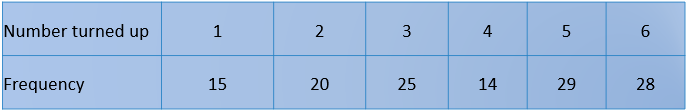

Is the die unbiased?

In [47]:
𝐻_0 = 'Die is unbiased'
𝐻_𝑎 = 'Die is biased'

In [48]:
freq_obs = [15, 20, 25, 14, 29, 28]

In [52]:
n_trials = 132
n = 6 # no of actual outcomes (from observed table)
prob = 1/6 # for 1 trial
alpha = 0.05

In [50]:
freq_exp = [prob*n_trials]*n
freq_exp

[22.0, 22.0, 22.0, 22.0, 22.0, 22.0]

In [51]:
chi_stat, p_value = stats.chisquare(freq_obs, freq_exp)
chi_stat, p_value

(9.59090909090909, 0.08769204644626248)

In [53]:
print('From p-value:')

if p_value <= alpha:
    print("Reject null hypothesis.", 𝐻_𝑎)
else:
    print("Failed to reject the null hypothesis.", 𝐻_0)

From p-value:
Failed to reject the null hypothesis. Die is unbiased


In [ ]:
##---------------OR

In [54]:
chi_crit = stats.chi2.ppf(1-alpha, df = n-1)
chi_crit

11.070497693516351

In [55]:
print('From chi-square value:')

if chi_stat  >= chi_crit:
    print("Reject null hypothesis.", 𝐻_𝑎)
else:
    print("Failed to reject the null hypothesis.", 𝐻_0)

From chi-square value:
Failed to reject the null hypothesis. Die is unbiased
